In [1]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
import random

import torch
import torch.nn as nn
import torch.optim as optim

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_absolute_error
file_path = 'C:\\Users\\Dell\\Downloads\\Garstec_AS09_chiara.hdf5'

In [4]:
# Inputs:

age_data_list = []
mass_data_list = []
FeHini_data_list = []
alphaMLT_data_list = []
yini_data_list = []
eta_data_list = []
alphaFe_data_list = []

# Outputs:

Teff_data_list = []
LPhot_data_list = []
FeH_data_list = []
Nu_data_list = []
massfin_data_list = []
numax_data_list = []
MeH_data_list = []



with h5py.File(file_path, 'r') as f:
    grid = f['grid']
    tracks = grid['tracks']
    
    selected_tracks = []
    
    
    for track_name in tracks:
        track = tracks[track_name]
        

        # Check if 'massini' dataset exists and is not empty
        if 'massini' in track and track['massini'].size > 0:
            massini_value = track['massini'][()][0]  # Get the first element if it exists
        else:
            massini_value = 0  # Put outside of our desired range so it isn't selected

        # Check if 'alphaMLT' dataset exists and is not empty
        if 'alphaMLT' in track and track['alphaMLT'].size > 0:
            alphaMLT_value = track['alphaMLT'][()][0]  # Get the first element if it exists
        else:
            alphaMLT_value = 0  # Put outside of our desired range so it isn't selected

        if massini_value == 1.1:
            selected_tracks.append(track)
            
            # Access and collect the data for each track:

            # Inputs:
            """
            age_data = track['age'][:]
            mass_data = track['massini'][:]
            FeHini_data = track['FeHini'][:]
            alphaMLT_data = track['alphaMLT'][:]
            yini_data = track['yini'][:]
            eta_data = track['eta'][:]
            alphaFe_data = track['alphaFe'][:]
            """

            epsilon = 1e-10  # Small constant to handle zero values
            age_data = np.sign(track['age'][:]) * np.log(np.abs(track['age'][:]) + epsilon)
            mass_data = np.sign(track['massini'][:]) * np.log(np.abs(track['massini'][:]) + epsilon)
            FeHini_data = np.sign(track['FeHini'][:]) * np.log(np.abs(track['FeHini'][:]) + epsilon)
            alphaMLT_data = np.sign(track['alphaMLT'][:]) * np.log(np.abs(track['alphaMLT'][:]) + epsilon)
            yini_data = np.sign(track['yini'][:]) * np.log(np.abs(track['yini'][:]) + epsilon)
            eta_data = np.sign(track['eta'][:]) * np.log(np.abs(track['eta'][:]) + epsilon)
            alphaFe_data = np.sign(track['alphaFe'][:]) * np.log(np.abs(track['alphaFe'][:]) + epsilon)
            # Outputs:

            teff_data = np.log(track['Teff'][:])
            luminosity_data = np.log(track['LPhot'][:])
            FeH_data = track['FeH'][:]
            Nu_data = track['dnufit'][:]
            massfin_data = track['massfin'][:]
            numax_data = track['numax'][:]
            MeH_data = track['MeH'][:]

            
            # Append to lists:

            # Inputs:

            age_data_list.append(age_data)
            mass_data_list.append(mass_data)
            FeHini_data_list.append(FeHini_data)
            alphaMLT_data_list.append(alphaMLT_data)
            yini_data_list.append(yini_data)
            eta_data_list.append(eta_data)
            alphaFe_data_list.append(alphaFe_data)

            # Outputs: 

            Teff_data_list.append(teff_data)
            LPhot_data_list.append(luminosity_data)
            FeH_data_list.append(FeH_data)
            Nu_data_list.append(Nu_data)
            massfin_data_list.append(massfin_data)
            numax_data_list.append(numax_data)
            MeH_data_list.append(MeH_data)

print(f"Total selected tracks: {len(selected_tracks)}")

Total selected tracks: 13


In [5]:
# Attempting with 13 tracks collected:

X_scaler = StandardScaler()
Y_scaler = StandardScaler()


# Inputs:
age_data_scaled = np.concatenate(age_data_list).reshape(-1, 1)
mass_data_scaled = np.concatenate(mass_data_list).reshape(-1, 1)
FeHini_data_scaled = np.concatenate(FeHini_data_list).reshape(-1, 1)
alphaMLT_data_scaled = np.concatenate(alphaMLT_data_list).reshape(-1, 1)
yini_data_scaled = np.concatenate(yini_data_list).reshape(-1, 1)
eta_data_scaled = np.concatenate(eta_data_list).reshape(-1, 1)
alphaFe_data_scaled = np.concatenate(alphaFe_data_list).reshape(-1, 1)

# Outputs - keep feh:

Teff_data_scaled = np.concatenate(Teff_data_list).reshape(-1, 1)
LPhot_data_scaled = np.concatenate(LPhot_data_list).reshape(-1, 1)
FeH_data_scaled = np.concatenate(FeH_data_list).reshape(-1, 1)
Nu_data_scaled = np.concatenate(Nu_data_list).reshape(-1, 1)
massfin_data_scaled = np.concatenate(massfin_data_list).reshape(-1, 1)
numax_data_scaled = np.concatenate(numax_data_list).reshape(-1, 1)
MeH_data_scaled = np.concatenate(MeH_data_list).reshape(-1, 1)


inputs = np.column_stack((age_data_scaled, mass_data_scaled, FeHini_data_scaled, alphaMLT_data_scaled, yini_data_scaled, eta_data_scaled, alphaFe_data_scaled))
outputs = np.column_stack((Teff_data_scaled, LPhot_data_scaled, FeH_data_scaled, Nu_data_scaled, massfin_data_scaled, numax_data_scaled, MeH_data_scaled))

X_train, X_test, Y_train, Y_test = train_test_split(inputs, outputs, test_size=0.2, random_state=1)

X_train = torch.FloatTensor(X_scaler.fit_transform(X_train)).view(-1, 7)
X_test = torch.FloatTensor(X_scaler.transform(X_test)).view(-1, 7)
Y_train = torch.FloatTensor(Y_scaler.fit_transform(Y_train))
Y_test = torch.FloatTensor(Y_scaler.transform(Y_test))

Epoch [100/10000], Train Loss: 0.2060, Test Loss: 0.1714
Epoch [200/10000], Train Loss: 0.0332, Test Loss: 0.0386
Epoch [300/10000], Train Loss: 0.0366, Test Loss: 0.0401
Epoch [400/10000], Train Loss: 0.0102, Test Loss: 0.0072
Epoch [500/10000], Train Loss: 0.0135, Test Loss: 0.0176
Epoch [600/10000], Train Loss: 0.0050, Test Loss: 0.0042
Epoch [700/10000], Train Loss: 0.0155, Test Loss: 0.0124
Epoch [800/10000], Train Loss: 0.0060, Test Loss: 0.0037
Epoch [900/10000], Train Loss: 0.0031, Test Loss: 0.0049
Epoch [1000/10000], Train Loss: 0.0038, Test Loss: 0.0030
Epoch [1100/10000], Train Loss: 0.0076, Test Loss: 0.0071
Epoch [1200/10000], Train Loss: 0.0039, Test Loss: 0.0021
Epoch [1300/10000], Train Loss: 0.0065, Test Loss: 0.0069
Epoch [1400/10000], Train Loss: 0.0020, Test Loss: 0.0026
Epoch [1500/10000], Train Loss: 0.0127, Test Loss: 0.0122
Epoch [1600/10000], Train Loss: 0.0053, Test Loss: 0.0064
Epoch [1700/10000], Train Loss: 0.0104, Test Loss: 0.0088
Epoch [1800/10000], Tra

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Epoch [10000/10000], Train Loss: 0.0003, Test Loss: 0.0003


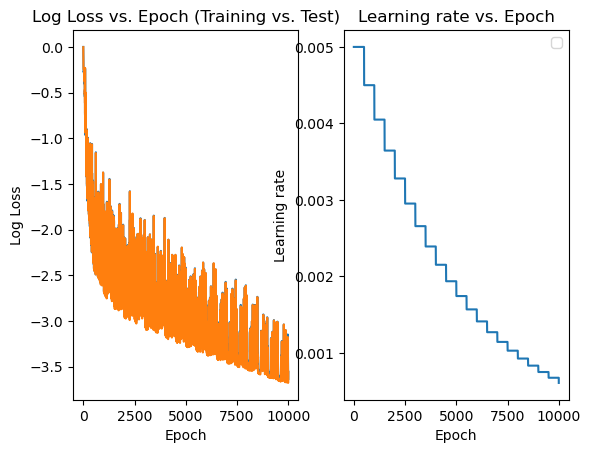

In [16]:
# Define a simple neural network model
class StellarModel(nn.Module):
    def __init__(self):
        super(StellarModel, self).__init__()
        self.fc1 = nn.Linear(7, 256)
        self.fc2 = nn.Linear(256, 256)
        self.fc3 = nn.Linear(256, 128)
        self.fc4 = nn.Linear(128, 64)
        self.fc5 = nn.Linear(64, 7)  

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = torch.relu(self.fc3(x))
        x = torch.relu(self.fc4(x))
        x = self.fc5(x)
        return x

# Instantiate the model, define loss and optimizer
model = StellarModel()
criterion = nn.MSELoss()
lr = 0.005
step_size = 500
optimizer = optim.Adam(model.parameters(), lr=lr)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size, gamma=0.9, last_epoch=-1)

num_epochs = 10000
train_loss = []  
test_loss = []   
learning_rate = []

for epoch in range(num_epochs):
    model.train()  # Set the model to training mode

    # Forward pass for training data
    outputs_train = model(X_train)
    epoch_train_loss = criterion(outputs_train, Y_train)

    # Backward pass and optimization for training data
    optimizer.zero_grad()  # Clear gradients
    epoch_train_loss.backward()  # Backpropagation
    optimizer.step()       # Update weights
    

    # Forward pass for test data
    model.eval()  # Set the model to evaluation mode (disables dropout, etc.)
    with torch.no_grad():
        outputs_test = model(X_test)
        epoch_test_loss = criterion(outputs_test, Y_test)  # Calculate test loss
    
    scheduler.step()
    lr_after  = optimizer.param_groups[0]["lr"]
    # Store the losses for plotting
    train_loss.append(epoch_train_loss.item())
    test_loss.append(epoch_test_loss.item())
    learning_rate.append(lr_after)

    # Print progress every 1000 epochs
    if (epoch + 1) % 100 == 0:
        print(f'Epoch [{epoch + 1}/{num_epochs}], Train Loss: {epoch_train_loss.item():.4f}, Test Loss: {epoch_test_loss.item():.4f}')

# Plot training and test loss
plt.subplot(1, 2, 1)
plt.plot(np.log10(train_loss), label='Training Loss (log scale)')
plt.plot(np.log10(test_loss), label='Test Loss (log scale)')
plt.xlabel('Epoch')
plt.ylabel('Log Loss')
plt.title('Log Loss vs. Epoch (Training vs. Test)')

plt.subplot(1, 2, 2)
plt.plot(learning_rate)
plt.xlabel('Epoch')
plt.ylabel('Learning rate')
plt.title('Learning rate vs. Epoch')
plt.legend()
plt.show()

In [17]:
# Save the model's state dictionary
torch.save(model.state_dict(), 'garstec_model_state.pth')

# Save the optimizer's state dictionary
torch.save(optimizer.state_dict(), 'garstec_optimizer_state.pth')

# Save the entire model
torch.save(model, 'garstec_entire_model.pth')

print("Model, optimizer, and entire model saved successfully.")

Model, optimizer, and entire model saved successfully.


In [38]:
model.eval()
with torch.no_grad():
    predictions = model(X_test)
    predictions = Y_scaler.inverse_transform(predictions.numpy())
    y_test_actual = Y_scaler.inverse_transform(Y_test.numpy())

    # Calculate evaluation metrics
    r2 = r2_score(y_test_actual, predictions)
    mae = mean_absolute_error(y_test_actual, predictions)

    print(f'R^2 Score: {r2:.4f}')
    print(f'Mean Absolute Error: {mae:.4f}')

NameError: name 'r2_score' is not defined

In [18]:
model.eval()
with torch.no_grad():
    # Make predictions for both training and test sets
    predictions_train = model(X_train).numpy()
    predictions_train = Y_scaler.inverse_transform(predictions_train)
    y_train_actual = Y_scaler.inverse_transform(Y_train.numpy())

    predictions_test = model(X_test).numpy()
    predictions_test = Y_scaler.inverse_transform(predictions_test)
    y_test_actual = Y_scaler.inverse_transform(Y_test.numpy())

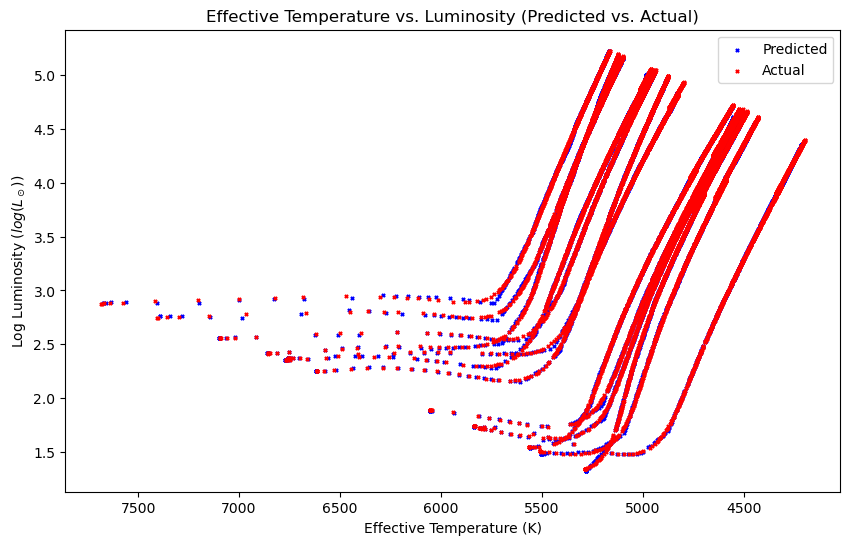

In [19]:
# Now plotting each set of parameters indivdually

# Log luminosity vs effective temperature (HR diagram)

predicted_temperature_train = predictions_train[:, 0]
predicted_luminosity_train = predictions_train[:, 1]
actual_temperature_train = y_train_actual[:, 0]
actual_luminosity_train = y_train_actual[:, 1]

predicted_temperature_test = predictions_test[:, 0]
predicted_luminosity_test = predictions_test[:, 1]
actual_temperature_test = y_test_actual[:, 0]
actual_luminosity_test = y_test_actual[:, 1]

# log luminosity:
#Log_Lum_pred = np.log10(predicted_luminosity_train)
#Log_Lum_actual = np.log10(actual_luminosity_train)

# Plotting the combined data
plt.figure(figsize=(10, 6))
plt.scatter(np.exp(predicted_temperature_train), predicted_luminosity_train, s=5, color='blue', marker='x', alpha=1, label='Predicted')
plt.scatter(np.exp(actual_temperature_train), actual_luminosity_train, s=5, color='red', marker='x', alpha=1, label='Actual')
plt.gca().invert_xaxis()
plt.xlabel("Effective Temperature (K)")
plt.ylabel("Log Luminosity ($log(L_\odot$))")
plt.title("Effective Temperature vs. Luminosity (Predicted vs. Actual)")
plt.legend()
plt.show()

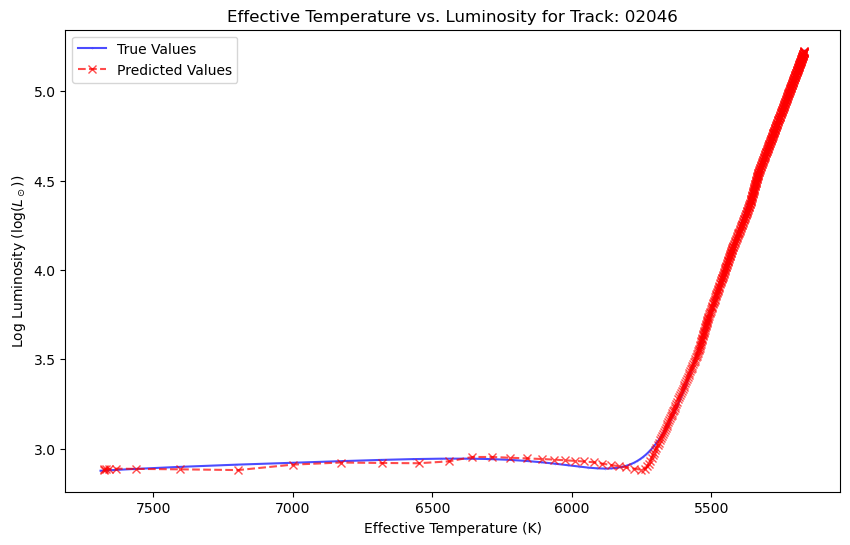

In [21]:
track_number = "02046"
with h5py.File(file_path, 'r') as f:
    # Paths for inputs
    path_age = f"grid/tracks/track{track_number}/age"
    path_mass = f"grid/tracks/track{track_number}/massini"
    path_FeHini = f"grid/tracks/track{track_number}/FeHini"
    path_alphaMLT = f"grid/tracks/track{track_number}/alphaMLT"
    path_yini = f"grid/tracks/track{track_number}/yini"
    path_eta = f"grid/tracks/track{track_number}/eta"
    path_alphaFe = f"grid/tracks/track{track_number}/alphaFe"

    # Paths for outputs
    path_teff = f"grid/tracks/track{track_number}/Teff"
    path_luminosity = f"grid/tracks/track{track_number}/LPhot"
    
    """
    fehini = f[path_FeHini][:].reshape(-1, 1)
    alphamlt = f[path_alphaMLT][:].reshape(-1, 1)
    ages = f[path_age][:].reshape(-1, 1)
    massini = f[path_mass][:].reshape(-1, 1)
    yini = f[path_yini][:].reshape(-1, 1)
    eta = f[path_eta][:].reshape(-1, 1)
    alphafe = f[path_alphaFe][:].reshape(-1, 1)
    """
    epsilon = 1e-10  # Small constant to handle zero values

    fehini = np.sign(f[path_FeHini][:]) * np.log(np.abs(f[path_FeHini][:]) + epsilon)
    alphamlt = np.sign(f[path_alphaMLT][:]) * np.log(np.abs(f[path_alphaMLT][:]) + epsilon)
    ages = np.sign(f[path_age][:]) * np.log(np.abs(f[path_age][:]) + epsilon)
    massini = np.sign(f[path_mass][:]) * np.log(np.abs(f[path_mass][:]) + epsilon)
    yini = np.sign(f[path_yini][:]) * np.log(np.abs(f[path_yini][:]) + epsilon)
    eta = np.sign(f[path_eta][:]) * np.log(np.abs(f[path_eta][:]) + epsilon)
    alphafe = np.sign(f[path_alphaFe][:]) * np.log(np.abs(f[path_alphaFe][:]) + epsilon)


    # Combine features into a single array
    all_features = np.column_stack((ages, massini, fehini, alphamlt, yini, eta, alphafe))
    
    # Retrieve actual values for plotting
    teff_specific = f[path_teff][:]
    luminosity_specific = f[path_luminosity][:]

# Scale the input features
all_features_scaled = X_scaler.transform(all_features)

# Convert to PyTorch tensor
all_features_tensor = torch.FloatTensor(all_features_scaled)

# Make predictions for the track
model.eval()
with torch.no_grad():
    predictions_specific = model(all_features_tensor).numpy()
    predictions_specific = Y_scaler.inverse_transform(predictions_specific)

# Extract predictions and actual values
predicted_teff = predictions_specific[:, 0]
predicted_luminosity = predictions_specific[:, 1]

log_actual_luminosity = np.log(luminosity_specific)

# Plot HR diagram for the specific track
plt.figure(figsize=(10, 6))
plt.plot(teff_specific, log_actual_luminosity, label='True Values', color='blue', alpha=0.7, marker='o', markersize=0.1)
plt.plot(np.exp(predicted_teff), predicted_luminosity, label='Predicted Values', color='red', linestyle='--', alpha=0.7, marker='x')
plt.gca().invert_xaxis()  # Effective temperature is plotted in reverse
plt.xlabel("Effective Temperature (K)")
plt.ylabel("Log Luminosity ($\log(L_\odot)$)")
plt.title(f"Effective Temperature vs. Luminosity for Track: {track_number}")
plt.legend()
plt.show()

In [22]:
# G_Gaia and FeH

predicted_FeH_train = predictions_train[:, 2]
predicted_Gaia_train = predictions_train[:, 3]
actual_FeH_train = y_train_actual[:, 2]
actual_Gaia_train = y_train_actual[:, 3]

predicted_FeH_test = predictions_test[:, 2]
predicted_Gaia_test = predictions_test[:, 3]
actual_FeH_test = y_test_actual[:, 2]
actual_Gaia_test = y_test_actual[:, 3]

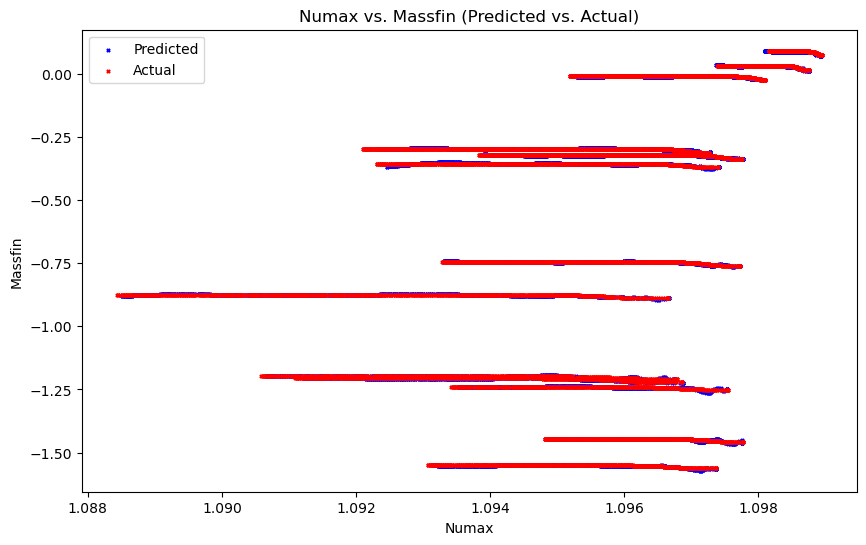

In [23]:
# Teff1, LPhot1, FeH1, Gaia1, numax1, MeH1, massfin1

predicted_numax_train = predictions_train[:, 4]
predicted_MeH_train = predictions_train[:, 5]
predicted_massfin_train = predictions_train[:, 6]
actual_numax_train = y_train_actual[:, 4]
actual_MeH_train = y_train_actual[:, 5]
actual_massfin_train = y_train_actual[:, 6]


predicted_numax_test = predictions_test[:, 4]
predicted_MeH_test = predictions_test[:, 5]
predicted_massfin_test = predictions_test[:, 6]
actual_numax_test = y_test_actual[:, 4]
actual_MeH_test = y_test_actual[:, 5]
actual_massfin_test = y_test_actual[:, 6]

plt.figure(figsize=(10, 6))
plt.scatter(predicted_numax_train, predicted_massfin_train, s=5, color='blue', marker='x', alpha=1, label='Predicted')
plt.scatter(actual_numax_train, actual_massfin_train, s=5, color='red', marker='x', alpha=1, label='Actual')
#plt.gca().invert_xaxis()
plt.xlabel("Numax")
plt.ylabel("Massfin")
plt.title("Numax vs. Massfin (Predicted vs. Actual)")
plt.legend()
plt.show()